In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

In [2]:
# Setting route of file from https://ourworldindata.org/coronavirus-source-data
file_population_per_city= "Resources/DpC_Data/Population_Per_City.csv"
# Reading File and store into Pandas data frame
PopulationCT_df = pd.read_csv(file_population_per_city, encoding="ISO-8859-1")
print(PopulationCT_df.shape)
PopulationCT_df.head(3)

(1147, 6)


,rank,Name,Country,Population,Prev,Growth
0,1,Tokyo,Japan,37393128,37435192,-0.0011
1,2,Delhi,India,30290936,29399140,0.0303
2,3,Shanghai,China,27058480,26317104,0.0282


In [3]:
# Setting route of file from https://ourworldindata.org/coronavirus-source-data
file_density_per_city= "Resources/DpC_Data/WW_Density.csv"
# Reading File and store into Pandas data frame
DensityCT_df = pd.read_csv(file_density_per_city, encoding="maclatin2")
print(DensityCT_df.shape)
DensityCT_df.head(3)

(126, 6)


,#,City,Country,Population,Land area (in sqKm),Density (people per sqKm)
0,1,Mumbai,India,14350000,484.0,29650
1,2,Kolkata,India,12700000,531.0,23900
2,3,Karachi,Pakistan,9800000,518.0,18900


In [4]:
file_gdp_per_city="Resources/DpC_Data/GDP_PER_CITY.csv"
# Reading File and store into Pandas data frame
GDP_City_df = pd.read_csv(file_gdp_per_city, encoding="maclatin2")
print(GDP_City_df.shape)
#GDP_City_df=GDP_City_df.columns("City","Country","Continent","GDP", "GDP per Capita")
GDP_City_df.head(3)



(302, 6)


,Ranking,Name,Coun,Continent,GDP,GDP per Capita
0,1,Tokyo,Japon,Asia,1617000,68776
1,2,New York,Estados Unidos,America,1403463,69915
2,3,Los Ángeles,Estados Unidos,America,860452,65082


In [5]:
file_CovD_per_city="Resources/DpC_Data/Deaths_Per_City.csv"
# Reading File and store into Pandas data frame
Des_Ct_covid = pd.read_csv(file_CovD_per_city)
print(Des_Ct_covid.shape)
Des_Ct_covid.head(3)

(20, 4)


,CITY,COUNTRY,Deaths per City,Comments
0,Tokyo,Japan,445,NaN
1,Delhi,India,6312,NaN
2,Shanghai,China,7,NaN


In [6]:
merge_data=PopulationCT_df.merge(GDP_City_df, on=["Name"])

merge_data.head(5)

,rank,Name,Country,Population,Prev,Growth,Ranking,Coun,Continent,GDP,GDP per Capita
0,1,Tokyo,Japan,37393128,37435192,-0.0011,1,Japon,Asia,1617000,68776
1,2,Delhi,India,30290936,29399140,0.0303,38,India,Asia,293637,12747
2,3,Shanghai,China,27058480,26317104,0.0282,8,China,Asia,594005,24065
3,5,Mexico City,Mexico,21782378,21671908,0.0051,18,Mexico,America,403561,19239
4,7,Cairo,Egypt,20900604,20484964,0.0203,131,Egipto,África,102165,7843


In [7]:
merge_data=merge_data.drop ('Coun',1)


In [8]:
merge_data=merge_data.rename(columns={"rank":"Ranking_Population","Ranking":"Ranking_GDP","Name":"City"})

In [9]:
merge_data=merge_data.set_index('Ranking_Population')
Des_Ct_covid.head()

,CITY,COUNTRY,Deaths per City,Comments
0,Tokyo,Japan,445,NaN
1,Delhi,India,6312,NaN
2,Shanghai,China,7,NaN
3,São Paulo,Brazil,38885,NaN
4,Mexico City,Mexico,11416,NaN


In [10]:
Des_Ct_covid["CITY"].unique


<bound method Series.unique of 0            Tokyo
1            Delhi
2         Shanghai
3        São Paulo
4      Mexico City
5            Cairo
6           Mumbai
7            Dhaka
8         New York
9          Karachi
10    Buenos Aires
11        Istanbul
12          Manila
13           Lagos
14          Moscow
15            Lima
16         Bangkok
17           Seoul
18          London
19          Madrid
Name: CITY, dtype: object>

In [11]:
Des_Ct_covid=Des_Ct_covid.drop ('Comments',1)
Des_Ct_covid.count()

CITY               20
COUNTRY            20
Deaths per City    20
dtype: int64

In [12]:
Des_Ct_covid=Des_Ct_covid.rename(columns={"CITY":"City"})

In [13]:
merge_data_cmpl=Des_Ct_covid.merge(merge_data, on=["City"])
merge_data_cmpl.head()

,City,COUNTRY,Deaths per City,Country,Population,Prev,Growth,Ranking_GDP,Continent,GDP,GDP per Capita
0,Tokyo,Japan,445,Japan,37393128,37435192,-0.0011,1,Asia,1617000,68776
1,Delhi,India,6312,India,30290936,29399140,0.0303,38,Asia,293637,12747
2,Shanghai,China,7,China,27058480,26317104,0.0282,8,Asia,594005,24065
3,Mexico City,Mexico,11416,Mexico,21782378,21671908,0.0051,18,America,403561,19239
4,Cairo,Egypt,6222,Egypt,20900604,20484964,0.0203,131,África,102165,7843


In [14]:
merge_data_cmpl["DpM_PC"] = (merge_data_cmpl["Deaths per City"]/merge_data_cmpl["Population "])*1000000
merge_data_cmpl

,City,COUNTRY,Deaths per City,Country,Population,Prev,Growth,Ranking_GDP,Continent,GDP,GDP per Capita,DpM_PC
0,Tokyo,Japan,445,Japan,37393128,37435192,-0.0011,1,Asia,1617000,68776,11.900582
1,Delhi,India,6312,India,30290936,29399140,0.0303,38,Asia,293637,12747,208.379167
2,Shanghai,China,7,China,27058480,26317104,0.0282,8,Asia,594005,24065,0.258699
3,Mexico City,Mexico,11416,Mexico,21782378,21671908,0.0051,18,America,403561,19239,524.093375
4,Cairo,Egypt,6222,Egypt,20900604,20484964,0.0203,131,África,102165,7843,297.694746
5,Mumbai,India,10009,India,20411274,20185064,0.0112,89,Asia,150853,7005,490.366255
6,Karachi,Pakistan,149,Pakistan,16093786,15741406,0.0224,301,Asia,164000,6000,9.258232
7,Buenos Aires,Argentina,6458,Argentina,15153729,15057273,0.0064,32,America,315885,23606,426.165731
8,Istanbul,Turkey,9950,Turkey,15190336,14967667,0.0149,25,Europa,348721,24867,655.021719
9,Manila,Philippines,3292,Philippines,13923452,13698889,0.0164,63,Asia,182842,14222,236.435620


In [15]:
merge_data_cmpl.dtypes

City                object
COUNTRY             object
Deaths per City      int64
Country             object
Population           int64
Prev                 int64
Growth             float64
Ranking_GDP          int64
Continent           object
GDP                  int64
GDP per Capita       int64
DpM_PC             float64
dtype: object

In [25]:
def linear_regression(x,y,title,x_label,y_label, size):
    from scipy.stats import linregress
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq=f"y = x * {str(round(slope,2))} + {str(round(intercept,2))}" 
    plt.figure(figsize=(20,10))
    
    plt.scatter(x,y, s=size, edgecolors="black")
    
    plt.plot(x,regress_values,"r-")
    
    plt.annotate(line_eq,xycoords="axes points",xy=(10,10),fontsize=18,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title,fontsize=25)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
    plt.xticks(x,rotation="vertical",fontsize=12)
    plt.savefig(f"Output/{title}.png")
    plt.show()
    return slope,intercept

The r-squared is: 0.021326069813938694


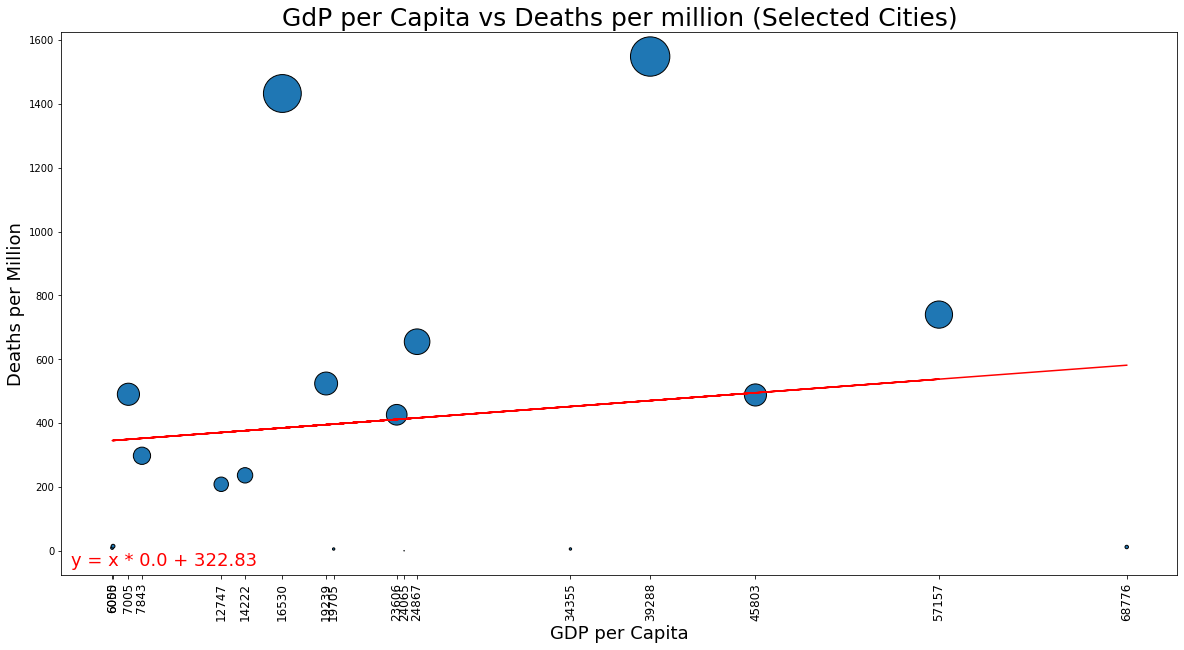

In [26]:
m,b=linear_regression(merge_data_cmpl["GDP per Capita"],merge_data_cmpl["DpM_PC"],"GdP per Capita vs Deaths per million (Selected Cities)","GDP per Capita","Deaths per Million", merge_data_cmpl["DpM_PC"])

<AxesSubplot:xlabel='GDP per Capita', ylabel='Deaths per City'>

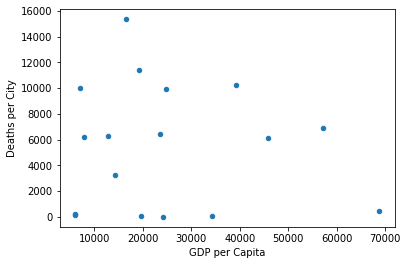

In [18]:
merge_data_cmpl.plot("GDP per Capita","Deaths per City",kind="scatter")

In [19]:
merge_data_cmpl.columns

Index(['City', 'COUNTRY', 'Deaths per City', 'Country', 'Population ', 'Prev',
       'Growth', 'Ranking_GDP', 'Continent', 'GDP', 'GDP per Capita',
       'DpM_PC'],
      dtype='object')

In [20]:
merge_data_density=merge_data_cmpl.merge(DensityCT_df, on=["City","Country"])
merge_data_density=merge_data_density.rename(columns={"Density (people per sqKm)":"Density"})


merge_data_density

,City,COUNTRY,Deaths per City,Country,Population,Prev,Growth,Ranking_GDP,Continent,GDP,GDP per Capita,DpM_PC,#,Population,Land area (in sqKm),Density
0,Tokyo,Japan,445,Japan,37393128,37435192,-0.0011,1,Asia,1617000,68776,11.900582,50,33200000,6993.0,4750
1,Delhi,India,6312,India,30290936,29399140,0.0303,38,Asia,293637,12747,208.379167,13,14300000,1295.0,11050
2,Shanghai,China,7,China,27058480,26317104,0.0282,8,Asia,594005,24065,0.258699,10,10000000,746.0,13400
3,Mexico City,Mexico,11416,Mexico,21782378,21671908,0.0051,18,America,403561,19239,524.093375,27,17400000,2072.0,8400
4,Cairo,Egypt,6222,Egypt,20900604,20484964,0.0203,131,África,102165,7843,297.694746,21,12200000,1295.0,9400
5,Mumbai,India,10009,India,20411274,20185064,0.0112,89,Asia,150853,7005,490.366255,1,14350000,484.0,29650
6,Karachi,Pakistan,149,Pakistan,16093786,15741406,0.0224,301,Asia,164000,6000,9.258232,3,9800000,518.0,18900
7,Buenos Aires,Argentina,6458,Argentina,15153729,15057273,0.0064,32,America,315885,23606,426.165731,46,11200000,2266.0,4950
8,Istanbul,Turkey,9950,Turkey,15190336,14967667,0.0149,25,Europa,348721,24867,655.021719,32,9000000,1166.0,7700
9,Manila,Philippines,3292,Philippines,13923452,13698889,0.0164,63,Asia,182842,14222,236.435620,15,14750000,1399.0,10550


In [21]:
merge_data_density["Density"] = merge_data_density["Population"]/merge_data_density["Land area (in sqKm)"]
merge_data_density

,City,COUNTRY,Deaths per City,Country,Population,Prev,Growth,Ranking_GDP,Continent,GDP,GDP per Capita,DpM_PC,#,Population,Land area (in sqKm),Density
0,Tokyo,Japan,445,Japan,37393128,37435192,-0.0011,1,Asia,1617000,68776,11.900582,50,33200000,6993.0,4747.604748
1,Delhi,India,6312,India,30290936,29399140,0.0303,38,Asia,293637,12747,208.379167,13,14300000,1295.0,11042.471042
2,Shanghai,China,7,China,27058480,26317104,0.0282,8,Asia,594005,24065,0.258699,10,10000000,746.0,13404.825737
3,Mexico City,Mexico,11416,Mexico,21782378,21671908,0.0051,18,America,403561,19239,524.093375,27,17400000,2072.0,8397.683398
4,Cairo,Egypt,6222,Egypt,20900604,20484964,0.0203,131,África,102165,7843,297.694746,21,12200000,1295.0,9420.849421
5,Mumbai,India,10009,India,20411274,20185064,0.0112,89,Asia,150853,7005,490.366255,1,14350000,484.0,29648.760331
6,Karachi,Pakistan,149,Pakistan,16093786,15741406,0.0224,301,Asia,164000,6000,9.258232,3,9800000,518.0,18918.918919
7,Buenos Aires,Argentina,6458,Argentina,15153729,15057273,0.0064,32,America,315885,23606,426.165731,46,11200000,2266.0,4942.630185
8,Istanbul,Turkey,9950,Turkey,15190336,14967667,0.0149,25,Europa,348721,24867,655.021719,32,9000000,1166.0,7718.696398
9,Manila,Philippines,3292,Philippines,13923452,13698889,0.0164,63,Asia,182842,14222,236.435620,15,14750000,1399.0,10543.245175


In [22]:
#merge_data_density = merge_data_density.drop(index=5)

The r-squared is: 0.04764518667198832


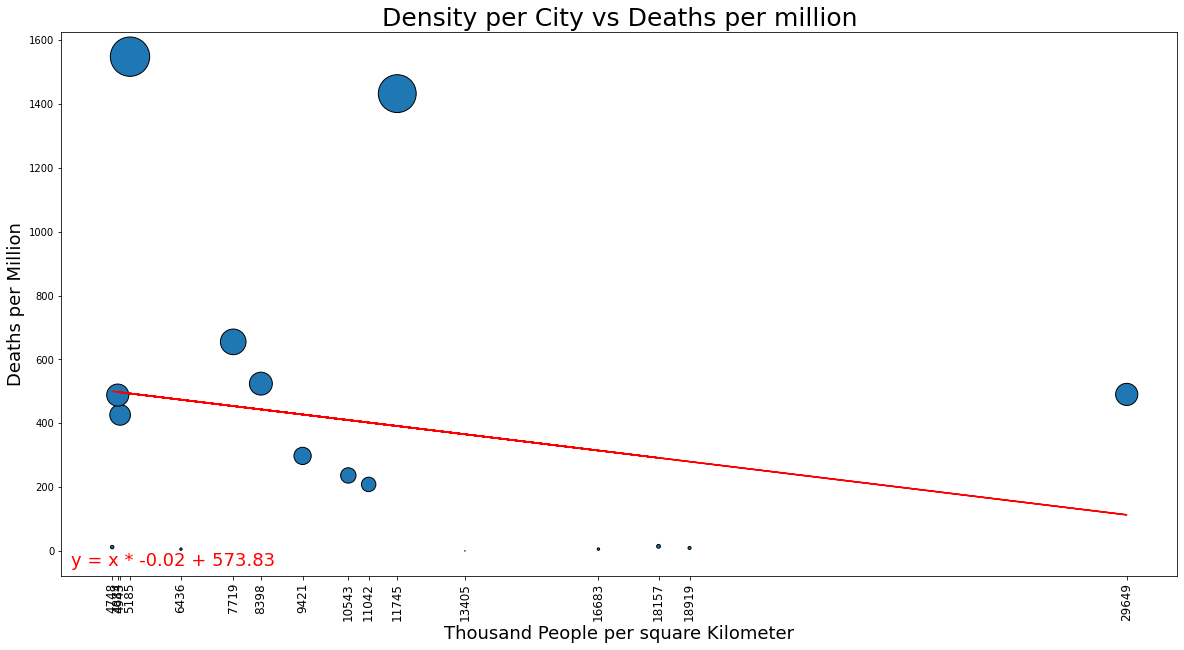

In [27]:

m,b=linear_regression(merge_data_density["Density"],merge_data_density["DpM_PC"],"Density per City vs Deaths per million","Thousand People per square Kilometer","Deaths per Million", merge_data_density["DpM_PC"])
